

# Titanic - Machine Learning from Disaster

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">ML - classification</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will answer some questions on the disaster of Titanic ship this data containing around 890 info about the passengers of Titanic from this data,We will figure out the reason of death for each case using EDA and ML, So lets get started.

Step one EDA
We will provide some questions such as:
<ul>
<li><a href="#Q1">1- How many people dead and how many survived ?</a></li>
<li><a href="#Q2">2- Is the class of each passenger effected on their death ?</a></li>
<li><a href="#Q3">3- What is the range age of the people on the ship ?</a></li>
<li><a href="#Q4">4- How many male and female dead ?</a></li>
</ul>

            
Step two Machine learning
<ul>
<li><a href="#ML1">1- LogisticRegression.</a></li>
<li><a href="#ML2">2- SVC.</a></li>
<li><a href="#ML3">3- DecisionTreeClassifier.</a></li>
<li><a href="#ML4">4- KNeighborsClassifier.</a></li>
<li><a href="#ML5">5- MultinomialNB.</a></li>
<li><a href="#ML6">6- RandomForestClassifier.</a></li>
<li><a href="#ML7">7- GridSearchCV.</a></li>
</ul>

* First thing first we will import some important functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


> In this section we will clear the unused data to can analyze it and answer the questions easily.

### General Properties

In [2]:
#Here we will load the data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Here we remove some unused data to the project
df.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace=True)

In [4]:
#check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
#explore the describe of the data.
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include="O")

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


> * After wrangling the data we will move to the next step to cleanig the data.


### Data Cleaning (Remove the unused data to make it more readable)

In [7]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [8]:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace=True)

In [9]:
#Now review
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> * After the wrangling and cleaning the data we need to move on the next section (Explore the data) , Here we will visualize the data and compute statistics and go through on each column and explore how this feature effect on their death.

<a id='Q1'></a>

### Research Question 1 : How many people dead and how many survived ??

In [10]:
print("Total dead people are :",df[df["Survived"]==0]["Survived"].count())
print("Total survived people are :",df[df["Survived"]==1]["Survived"].count())

Total dead people are : 549
Total survived people are : 342


<AxesSubplot:xlabel='Survived', ylabel='count'>

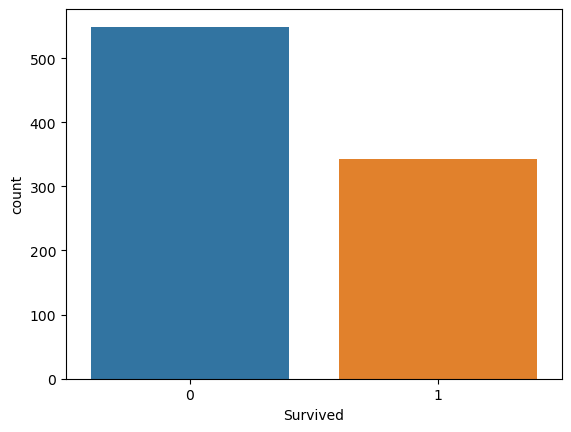

In [11]:
sns.countplot(x="Survived",data=df)

<a id='Q2'></a>

### Research Question  2- Is the class of each passenger effected on their death ?

In [12]:
pd.DataFrame(df.groupby(["Pclass","Survived"])["Survived"].count())

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

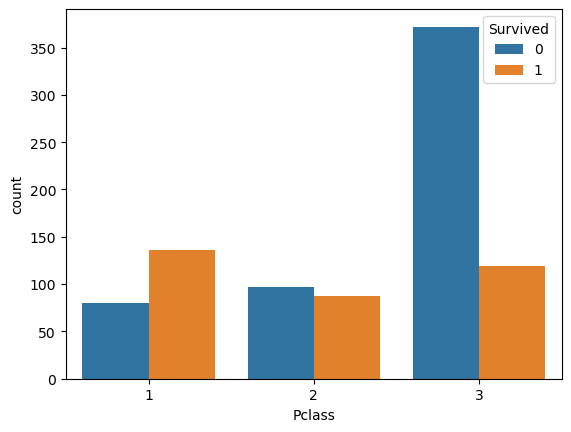

In [13]:
sns.countplot(x="Pclass",hue="Survived",data=df);

As we see above around 68% of the total dead people from class 3 and only 21.7% is alive

<a id='Q3'></a>

### Research Question  3- What is the range age of the people on the ship ?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


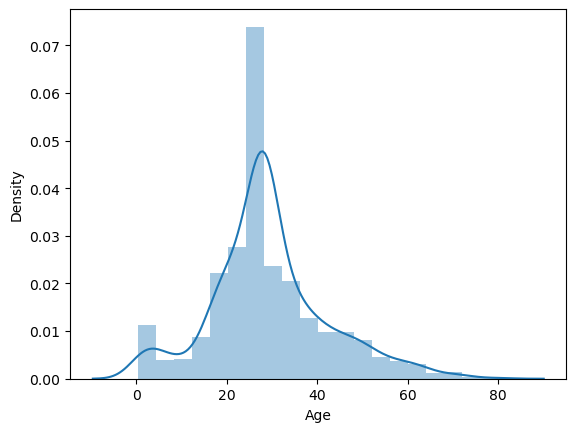

In [14]:
sns.distplot(df["Age"],bins=20,kde=True);

Almost of the passengers are on age from 21 and 35

How many male and female dead

First we should take in considration the number of the total male and female on titanic to make sure is there counts are balanced or not

<a id='Q4'></a>

### Research Question  4- How many male and female dead ?


<AxesSubplot:xlabel='Sex', ylabel='count'>

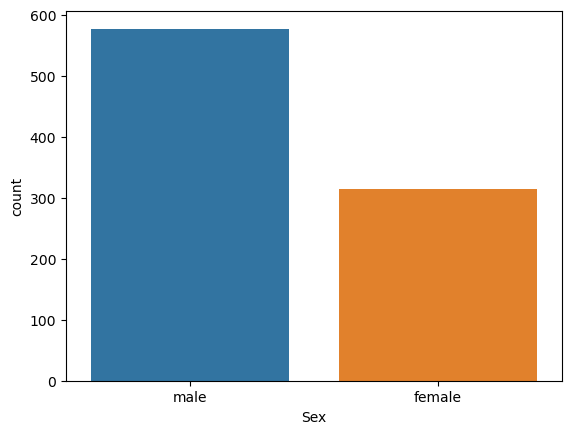

In [15]:
sns.countplot(data=df,x="Sex")

as above the number of the male passengers are the double number of female so i suggest to normalize it.

In [16]:
group=df.groupby("Sex")["Survived"].value_counts(normalize=True).rename("Percentage").reset_index()
group

,Sex,Survived,Percentage
0,female,1,0.742038
1,female,0,0.257962
2,male,0,0.811092
3,male,1,0.188908


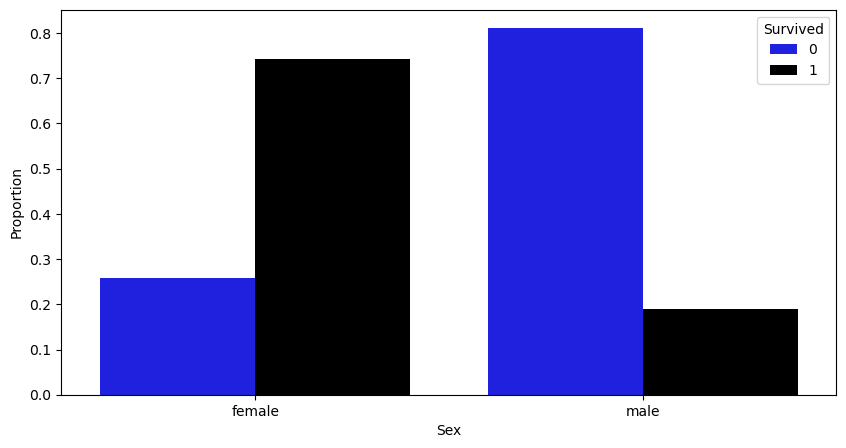

In [17]:
# Get the counts of survivors and non-survivors for each gender
plt.figure(figsize=(10,5))
counts = df.groupby("Sex")["Survived"].value_counts(normalize=True).rename("proportion").reset_index()

# Create a stacked bar chart using seaborn
sns.barplot(x="Sex", y="proportion", hue="Survived", data=counts, palette={0: "blue", 1: "black"})

# Set the axis labels and legend
plt.xlabel("Sex")
plt.ylabel("Proportion")
    
plt.show()

As we see on the above plot around 80% of male in the ship die and around 75% of women are lives.

<a id='ML'></a>

# Step Two ML

1st we will convert all the data to be numeric by using get dummies in pandas

In [18]:
data=pd.get_dummies(df,columns=['Embarked',"Sex"],drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [19]:
X= data.drop("Survived",axis=1).values
y= data["Survived"].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=1)

<a id='ML1'></a>


### LogisticRegression

In [22]:
linear=LogisticRegression()
linear.fit(x_train,y_train)

y_train_pred=linear.predict(x_train)
print("linear Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_LR=linear.predict(x_test)
print("linear Report for testing : \n",classification_report(y_test,y_test_pred_LR))

linear Report for training : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       443
           1       0.74      0.70      0.72       269

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

**************************************************
linear Report for testing : 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.80      0.73      0.76        73

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<a id='ML2'></a>


### SVC

In [23]:
from sklearn.svm import SVC
SVC=SVC(kernel="linear",gamma='auto')

SVC.fit(x_train,y_train)

y_train_pred=SVC.predict(x_train)
print("SVC Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_SVC=SVC.predict(x_test)
print("SVC Report for testing : \n",classification_report(y_test,y_test_pred_SVC))

SVC Report for training : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       443
           1       0.74      0.68      0.71       269

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712

**************************************************
SVC Report for testing : 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.75      0.67      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



<a id='ML3'></a>


### DecisionTreeClassifier

In [24]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

y_train_pred=DT.predict(x_train)
print("DecisionTreeClassifier Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_DT=DT.predict(x_test)
print("DecisionTreeClassifier Report for testing : \n",classification_report(y_test,y_test_pred_DT))

DecisionTreeClassifier Report for training : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       443
           1       1.00      0.97      0.98       269

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712

**************************************************
DecisionTreeClassifier Report for testing : 
               precision    recall  f1-score   support

           0       0.77      0.87      0.81       106
           1       0.76      0.62      0.68        73

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



<a id='ML4'></a>


### KNN

In [25]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

y_train_pred=KNN.predict(x_train)
print("KNN Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_KNN=KNN.predict(x_test)
print("KNN Report for testing : \n",classification_report(y_test,y_test_pred_KNN))

KNN Report for training : 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       443
           1       0.79      0.66      0.72       269

    accuracy                           0.81       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.81      0.80       712

**************************************************
KNN Report for testing : 
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       106
           1       0.69      0.48      0.56        73

    accuracy                           0.70       179
   macro avg       0.69      0.66      0.67       179
weighted avg       0.70      0.70      0.69       179



<a id='ML5'></a>


### NaiveBayse

In [26]:
NaiveBayse=MultinomialNB()
NaiveBayse.fit(x_train,y_train)

y_train_pred=NaiveBayse.predict(x_train)
print("NaiveBayse Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_NB=NaiveBayse.predict(x_test)
print("NaiveBayse Report for testing : \n",classification_report(y_test,y_test_pred_NB))

NaiveBayse Report for training : 
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       443
           1       0.64      0.48      0.55       269

    accuracy                           0.70       712
   macro avg       0.68      0.66      0.66       712
weighted avg       0.69      0.70      0.69       712

**************************************************
NaiveBayse Report for testing : 
               precision    recall  f1-score   support

           0       0.66      0.80      0.73       106
           1       0.59      0.41      0.48        73

    accuracy                           0.64       179
   macro avg       0.63      0.61      0.61       179
weighted avg       0.63      0.64      0.63       179



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<a id='ML6'></a>


### RandomForestClassifier

In [28]:
for i in [100,150,300,400,450,500]:
    RF=RandomForestClassifier(n_estimators=i)
    RF.fit(x_train,y_train)
    y_test_pred_RF=RF.predict(x_test)
    print(accuracy_score(y_test,y_test_pred_RF))

0.770949720670391
0.7877094972067039
0.7932960893854749
0.7877094972067039
0.7877094972067039
0.7877094972067039


<a id='ML7'></a>


### GridSearchCV

In [29]:
GS=GridSearchCV(estimator=RandomForestClassifier(),param_grid={
    "n_estimators":[100,200,300],
    "criterion":["gini","entropy"],
})
GS.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300]})

In [30]:
best=GS.best_params_
best

{'criterion': 'entropy', 'n_estimators': 200}

In [31]:
RF=RandomForestClassifier(n_estimators=i)
RF.fit(x_train,y_train)
y_test_pred=RF.predict(x_test)

RF=RandomForestClassifier(n_estimators=300,criterion="entropy")
RF.fit(x_train,y_train)

y_train_pred=RF.predict(x_train)
print("RandomForestClassifier Report for training : \n",classification_report(y_train,y_train_pred))

print("*"*50)

y_test_pred_RF_GS=RF.predict(x_test)
print("RandomForestClassifier Report for testing : \n",classification_report(y_test,y_test_pred_RF_GS))

RandomForestClassifier Report for training : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       443
           1       0.99      0.98      0.98       269

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712

**************************************************
RandomForestClassifier Report for testing : 
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       106
           1       0.79      0.62      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



<a id='conclusions'></a>

# Conclusions

In [32]:
pd.DataFrame({"Model name":["LR","SVC","DT","KNN","NB","RF"],"Score":[accuracy_score(y_test,y_test_pred_LR),
accuracy_score(y_test,y_test_pred_SVC),
accuracy_score(y_test,y_test_pred_DT),
accuracy_score(y_test,y_test_pred_KNN),
accuracy_score(y_test,y_test_pred_NB),
accuracy_score(y_test,y_test_pred_RF)]})

,Model name,Score
0,LR,0.815642
1,SVC,0.776536
2,DT,0.765363
3,KNN,0.698324
4,NB,0.642458
5,RF,0.787709
